# Linear Regression

### Implementing Linear Regression for predicting profit of a food truck given the population and profits of different cities

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as skm

In [58]:
df1 = pd.read_csv('Data1.txt',names = ['Population_10000s', 'Profit_10000s_$'])

In [59]:
df1

,Population_10000s,Profit_10000s_$
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [60]:
df=pd.read_table('Data1.txt', delimiter = ',',names = ['Population_10000s', 'Profit_10000s_$'])

In [61]:
df

,Population_10000s,Profit_10000s_$
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [62]:
df.describe()

,Population_10000s,Profit_10000s_$
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Scatter plot of Population vs Profit


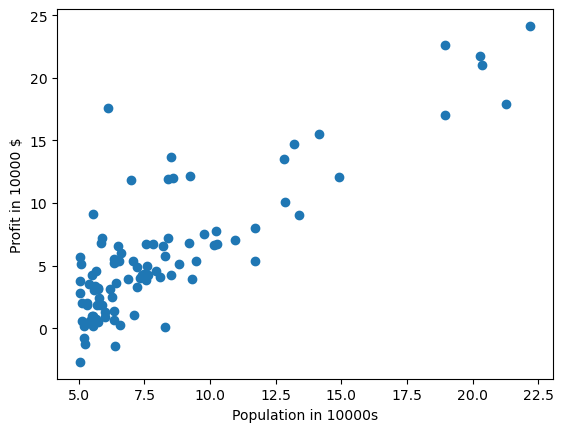

In [63]:
plt.scatter(df['Population_10000s'],df['Profit_10000s_$'])
plt.xlabel('Population in 10000s')
plt.ylabel('Profit in 10000 $')
plt.show()

### Train-Test Split

In [64]:
from sklearn.model_selection import train_test_split

x = df[['Population_10000s']]
y = df[['Profit_10000s_$']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 101)


print(f'Total # of sample in whole dataset: {len(x)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Shape of x_train: {x_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(x_test)}')
print(f'Shape of x_test: {x_test.shape}')

Total # of sample in whole dataset: 97
**************************************************
Total # of sample in train dataset: 64
Shape of x_train: (64, 1)
**************************************************
Total # of sample in test dataset: 33
Shape of x_test: (33, 1)


### Fitting Simple Linear Regression to Training set

In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [93]:
print(regressor.coef_, regressor.intercept_)

[[1.13581538]] [-3.6107158]


### Predicitng Test set results

In [66]:
y_pred = regressor.predict(x_test)

### Visualizing Training set data and Best-fit / regression line

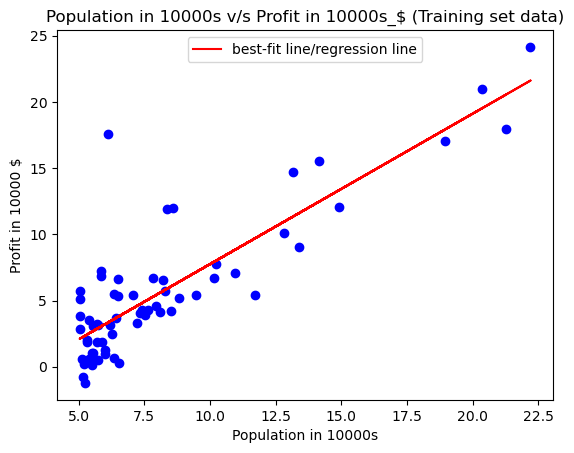

In [67]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, regressor.predict(x_train) , color = 'red',label = 'best-fit line/regression line')
plt.title('Population in 10000s v/s Profit in 10000s_$ (Training set data)')
plt.xlabel('Population in 10000s')
plt.ylabel('Profit in 10000 $')
plt.legend(loc = 'upper center')
plt.show()

### Visualizing Test set data and Best-fit / regression line

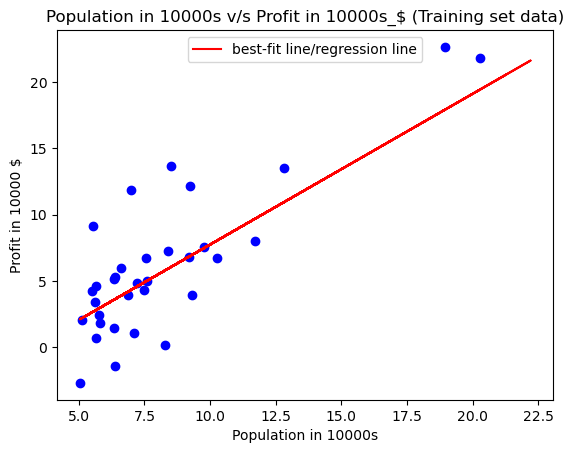

In [68]:
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_train, regressor.predict(x_train) , color = 'red',label = 'best-fit line/regression line')
plt.title('Population in 10000s v/s Profit in 10000s_$ (Training set data)')
plt.xlabel('Population in 10000s')
plt.ylabel('Profit in 10000 $')
plt.legend(loc = 'upper center')
plt.show()

In [69]:
MAE = skm.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",MAE)

Mean Absolute Error: 2.4583355713550614


In [88]:
MAPE = np.mean(np.abs( (y_test-y_pred) / y_test ))*100
print("Mean Absolute Percentage Error:",np.mean(np.abs( (y_test-y_pred) / y_test))*100)
print("Mean Absolute Percentage Error: ",MAPE)

Mean Absolute Percentage Error: Profit_10000s_$    181.008898
dtype: float64
Mean Absolute Percentage Error:  Profit_10000s_$    181.008898
dtype: float64


In [89]:
MSE = skm.mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",MSE)

Mean Squared Error:  10.76583715075204


In [90]:
RMSE = np.sqrt(skm.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",RMSE)

Root Mean Squared Error: 3.2811335161422552


In [91]:
R2 = skm.r2_score(y_test, y_pred)
print("R^2: ",R2)

n=x_test.shape[0]
p=x_test.shape[1] - 1   # subtract 1 coz test.shape also includes attribute we have to predict

adj_R2 = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: ',adj_R2)

R^2:  0.6585859672651708
Adjusted R Squared:  0.6585859672651708


In [92]:
results = [MSE, RMSE, MAE, MAPE, R2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,10.765837
1,RMSE,3.281134
2,MAE,2.458336
3,MAPE,Profit_10000s_$ 181.008898 dtype: float64
4,r2,0.658586
5,adj_r2,0.658586
